In [5]:
from sklearn.linear_model import LogisticRegression as logreg
import pandas as pd
freedom = pd.read_csv('data_test.csv')
#1540 rows

drop_nan = freedom.drop('Country code', axis=1)
#get rid of first column

freedom1 = drop_nan.apply(pd.to_numeric, errors='coerce')
freedom2 = freedom1.dropna()
#freedom1 is a new dataset where all strings are now NAN
#freedom2 is the new dataframe with all rows containing a '-' removed

index = freedom2.index
number_of_rows = len(index)
print(number_of_rows)
#Code to get number of rows (checking that it hasnt narrowed our data too much)

freedom2.head()
#print(freedom2)


1163


,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax,ef_government_soa,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,...,ef_money_sd,ef_money_inflation,ef_money_currency,ef_trade_tariffs,ef_trade_regulatory,ef_trade_movement,ef_regulation_credit,ef_regulation_labor,ef_regulation_business,pf_score
0,8.1,7.3,8.0,8.0,6.2,2.5,3.1,4.6,8.3,4.2,...,9.7,9.6,10.0,9.0,7.7,6.7,9.7,6.9,6.7,8.01
1,2.7,7.8,0.0,4.5,2.9,4.3,4.3,4.8,4.2,5.0,...,8.5,8.9,5.0,6.9,2.6,1.6,5.1,5.4,5.7,5.20
2,6.3,8.9,6.0,9.5,3.1,1.4,1.7,3.3,3.3,4.2,...,4.2,3.7,5.0,7.1,3.7,2.0,6.7,5.4,4.9,5.98
3,5.4,6.3,6.0,4.0,6.9,3.6,3.0,4.4,7.5,3.3,...,6.0,4.9,10.0,6.6,4.9,4.7,6.1,5.1,5.7,8.04
4,7.2,7.3,8.0,5.0,9.5,4.0,4.2,5.8,5.8,5.0,...,9.5,9.8,10.0,8.6,7.4,6.8,9.3,6.4,6.9,7.15


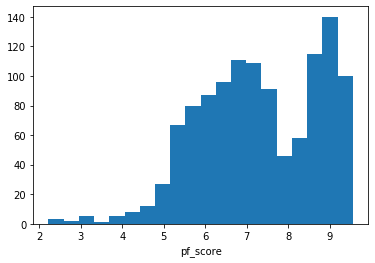

In [19]:
import matplotlib.pyplot as plt
plt.hist(freedom2['pf_score'], bins=20)  # plotting the historgam with 50 bins
plt.xlabel('pf_score')  # setting the label for the x axis
plt.show()

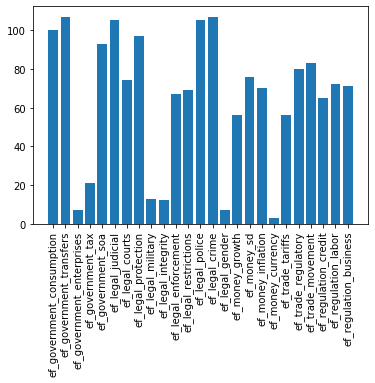

In [20]:
features = freedom2.columns[:-1].to_list()
nvar = []
for f in features:
    nvar.append(len(freedom2[f].unique()))
plt.bar(features, nvar)
plt.xticks(range(len(features)), features, rotation=90)
plt.show()

In [98]:
import numpy as np

def rss(x, y, a, b):
    '''
    This function calculates the RSS for the model y = a*x + b value given:
    - x: a list
    - y: a list
    - a: a float
    - b: a float
    '''
    x = np.asarray(x) #Cast to numpy array so that we can do arithmatic with arrays
    y = np.asarray(y)
    
    y_predicted = a*x + b # This is an array. Uncomment next line to see
    #print(y_predicted)
    residuals = y - y_predicted
    plt.plot(x, y, 'o')
    plt.plot(x, y_predicted)
    return sum(pow(residuals, 2))

count     1620
unique     483
top          -
freq        80
Name: pf_score, dtype: object
fit coefficient a = [[-0.22245126]]
fit intercept b = [8.5355512]


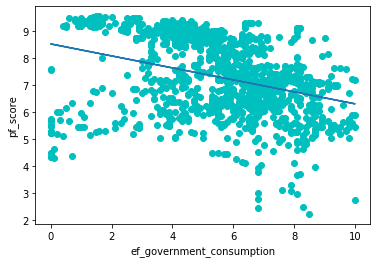

In [99]:
print(freedom['pf_score'].describe())

x_attribute = freedom2['ef_government_consumption']
y_hf_score = freedom2['pf_score']

import sklearn.linear_model

def linmodel(x, y, z):
    
    linearModel = sklearn.linear_model.LinearRegression()
    df = pd.DataFrame()  # creating an empty dataframe
    df['x'] = x  # creating a column named 'x'
    df['y'] = y
    x1 = df['x'].values.reshape(-1, 1)
    y1 = df['y'].values.reshape(-1, 1)
    linearModel.fit(x1, y1)
    print('fit coefficient a = {}'.format( linearModel.coef_ ))
    a = linearModel.coef_
    print('fit intercept b = {}'.format( linearModel.intercept_ ))
    b = linearModel.intercept_
    best_fit = rss(x1, y1, a, b)
    plt.xlabel(z)
    plt.ylabel('pf_score')
    return

linmodel(x_attribute, y_hf_score, 'ef_government_consumption')

fit coefficient a = [[-0.41939309]]
fit intercept b = [10.4179914]


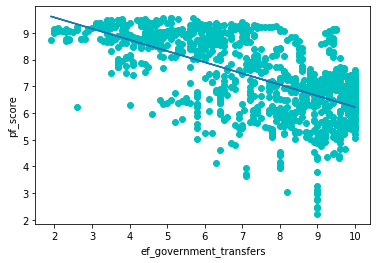

In [66]:
linmodel(freedom2['ef_government_transfers'], y_hf_score, 'ef_government_transfers' )

fit coefficient a = [[0.22720807]]
fit intercept b = [5.77893206]


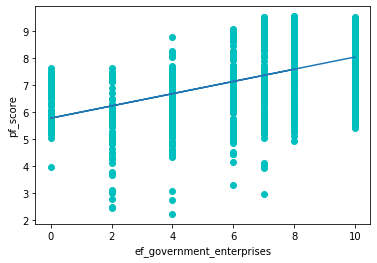

In [67]:
linmodel(freedom2['ef_government_enterprises'], y_hf_score, 'ef_government_enterprises')

fit coefficient a = [[-0.27138793]]
fit intercept b = [9.03045334]


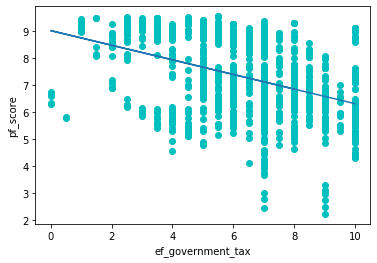

In [68]:
linmodel(freedom2['ef_government_tax'], y_hf_score, 'ef_government_tax')

fit coefficient a = [[0.48798678]]
fit intercept b = [4.0522793]


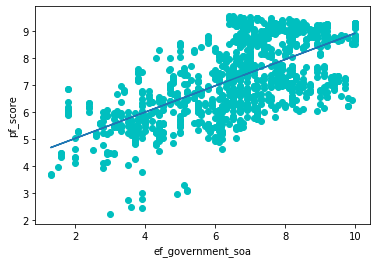

In [69]:
linmodel(freedom2['ef_government_soa'], y_hf_score, 'ef_government_soa')

fit coefficient a = [[0.29394483]]
fit intercept b = [5.82452932]


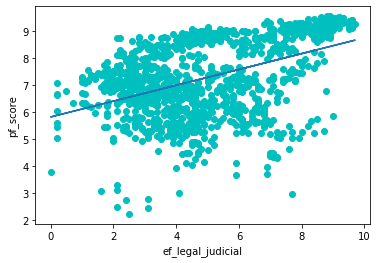

In [70]:
linmodel(freedom2['ef_legal_judicial'], y_hf_score, 'ef_legal_judicial')

fit coefficient a = [[0.2836902]]
fit intercept b = [6.03458559]


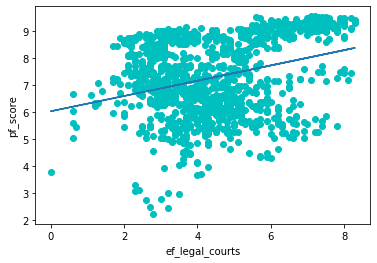

In [71]:
linmodel(freedom2['ef_legal_courts'], y_hf_score, 'ef_legal_courts')

fit coefficient a = [[0.39027815]]
fit intercept b = [5.06994326]


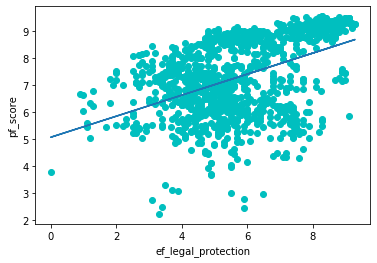

In [72]:
linmodel(freedom2['ef_legal_protection'], y_hf_score, 'ef_legal_protection')

fit coefficient a = [[0.35830899]]
fit intercept b = [4.8757543]


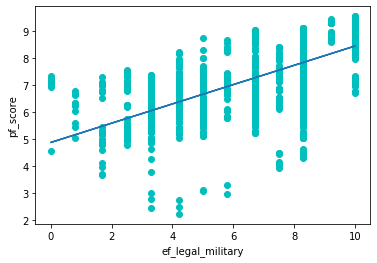

In [73]:
linmodel(freedom2['ef_legal_military'], y_hf_score, 'ef_legal_military')

fit coefficient a = [[0.33734565]]
fit intercept b = [5.18248163]


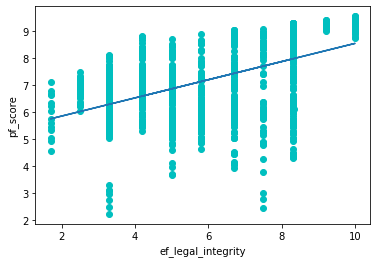

In [74]:
linmodel(freedom2['ef_legal_integrity'], y_hf_score, 'ef_legal_integrity')

fit coefficient a = [[0.37341548]]
fit intercept b = [5.59366498]


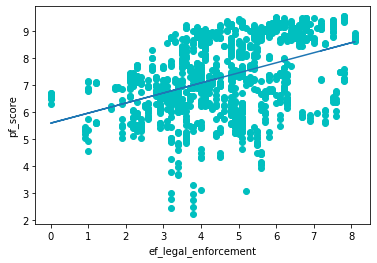

In [75]:
linmodel(freedom2['ef_legal_enforcement'], y_hf_score, 'ef_legal_enforcement')

fit coefficient a = [[0.22196199]]
fit intercept b = [5.62523226]


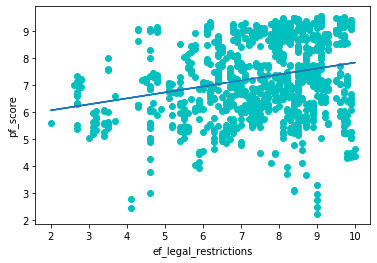

In [76]:
linmodel(freedom2['ef_legal_restrictions'], y_hf_score, 'ef_legal_restrictions')

fit coefficient a = [[0.34177602]]
fit intercept b = [5.38515885]


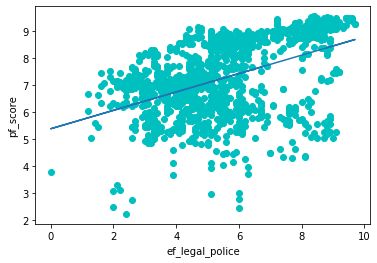

In [77]:
linmodel(freedom2['ef_legal_police'], y_hf_score, 'ef_legal_police')

fit coefficient a = [[0.2810026]]
fit intercept b = [5.64730136]


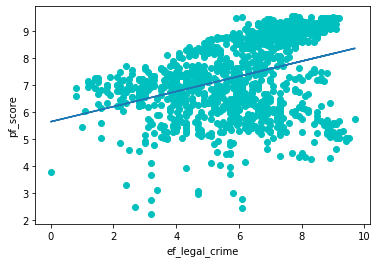

In [78]:
linmodel(freedom2['ef_legal_crime'], y_hf_score, 'ef_legal_crime')

fit coefficient a = [[6.81555981]]
fit intercept b = [1.18439381]


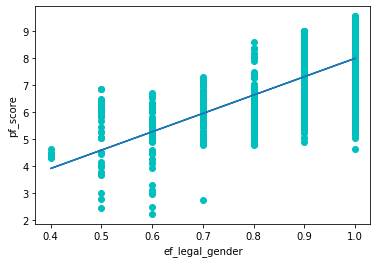

In [79]:
linmodel(freedom2['ef_legal_gender'], y_hf_score, 'ef_legal_gender')

fit coefficient a = [[0.16194248]]
fit intercept b = [5.90592687]


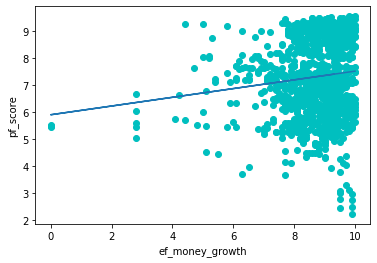

In [80]:
linmodel(freedom2['ef_money_growth'], y_hf_score, 'ef_money_growth')

fit coefficient a = [[0.43259115]]
fit intercept b = [3.6546207]


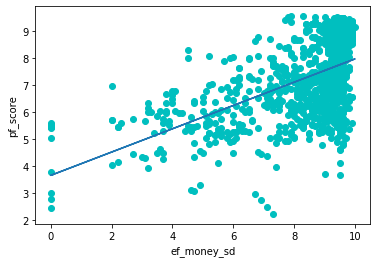

In [81]:
linmodel(freedom2['ef_money_sd'], y_hf_score, 'ef_money_sd')

fit coefficient a = [[0.35512151]]
fit intercept b = [4.1499911]


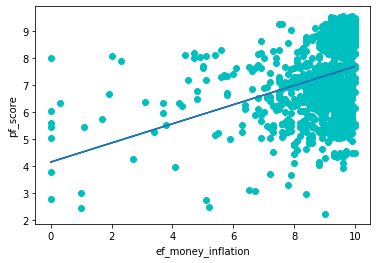

In [82]:
linmodel(freedom2['ef_money_inflation'], y_hf_score, 'ef_money_inflation')

fit coefficient a = [[0.14188547]]
fit intercept b = [6.25130901]


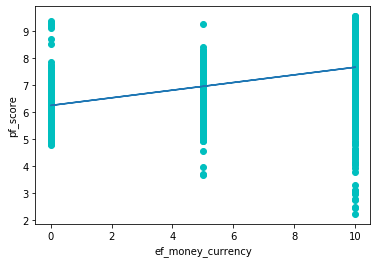

In [83]:
linmodel(freedom2['ef_money_currency'], y_hf_score, 'ef_money_currency')

fit coefficient a = [[0.51809532]]
fit intercept b = [3.37892933]


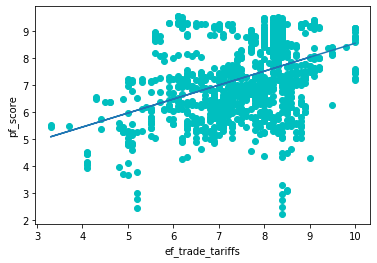

In [84]:
linmodel(freedom2['ef_trade_tariffs'], y_hf_score, 'ef_trade_tariffs')

fit coefficient a = [[0.56130139]]
fit intercept b = [3.72215842]


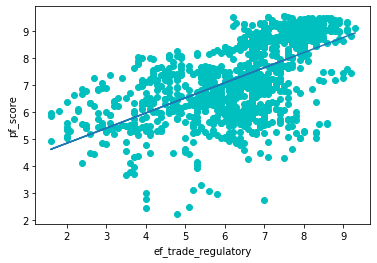

In [85]:
linmodel(freedom2['ef_trade_regulatory'], y_hf_score, 'ef_trade_regulatory')

fit coefficient a = [[0.39789912]]
fit intercept b = [5.22088453]


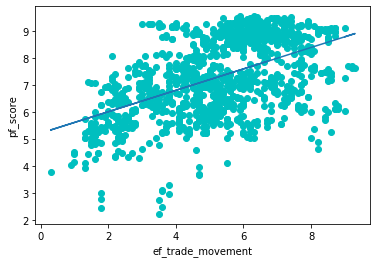

In [86]:
linmodel(freedom2['ef_trade_movement'], y_hf_score, 'ef_trade_movement')

fit coefficient a = [[0.49266612]]
fit intercept b = [3.23913157]


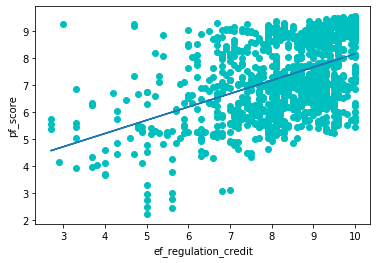

In [87]:
linmodel(freedom2['ef_regulation_credit'], y_hf_score, 'ef_regulation_credit')

fit coefficient a = [[0.16748473]]
fit intercept b = [6.23472977]


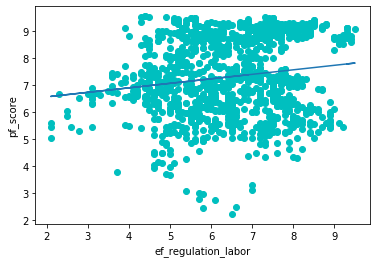

In [88]:
linmodel(freedom2['ef_regulation_labor'], y_hf_score, 'ef_regulation_labor')

fit coefficient a = [[0.56095946]]
fit intercept b = [3.70572482]


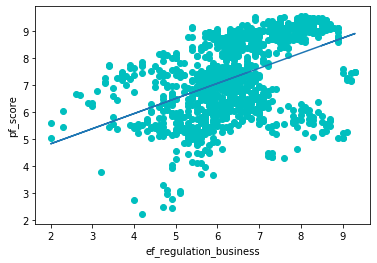

In [89]:
linmodel(freedom2['ef_regulation_business'], y_hf_score, 'ef_regulation_business')

In [100]:
print(freedom2['pf_score'].describe())

count    1163.000000
mean        7.308435
std         1.437011
min         2.220000
25%         6.240000
50%         7.230000
75%         8.710000
max         9.560000
Name: pf_score, dtype: float64


### SPLITTING TO CRITICAL/NON CRITICAL